* Check Breakout-v0.

In [10]:
import gym
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.animation as animation
import cv2

In [3]:
env = gym.make("Breakout-v0")

In [14]:
pobs = env.reset()

In [16]:
%matplotlib inline

# 次元の確認
print(pobs.shape)

(210, 160, 3)


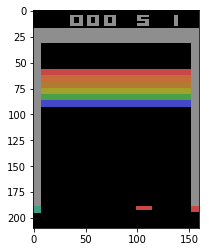

In [17]:
%matplotlib inline

# 画面の確認
plt.imshow(pobs)
plt.show()

デフォルト


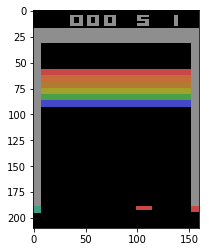

グレースケールに変換


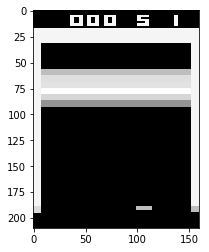

リサイズ
(210, 160)
(105, 80)


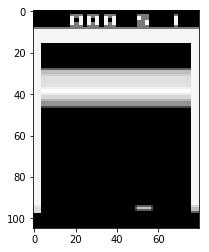

カット
(50, 70)


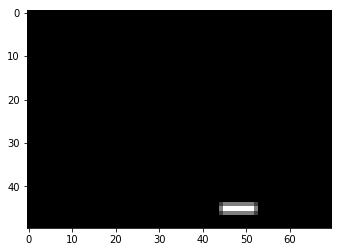

In [18]:
%matplotlib inline

print("デフォルト")
plt.imshow(pobs, cmap="gray")
plt.show()

print("グレースケールに変換")
pobs = cv2.cvtColor(pobs, cv2.COLOR_RGB2GRAY)
plt.imshow(pobs, cmap="gray")
plt.show()

print("リサイズ")
print(pobs.shape)
height, width = pobs.shape
size = (int(width * 0.5), int(height * 0.5))
pobs = cv2.resize(pobs, size)
print(pobs.shape)
plt.imshow(pobs, cmap="gray")
plt.show()

print("カット")
pobs = pobs[50:100, 5:75]
print(pobs.shape)
plt.imshow(pobs, cmap="gray")
plt.show()

<IPython.core.display.Javascript object>


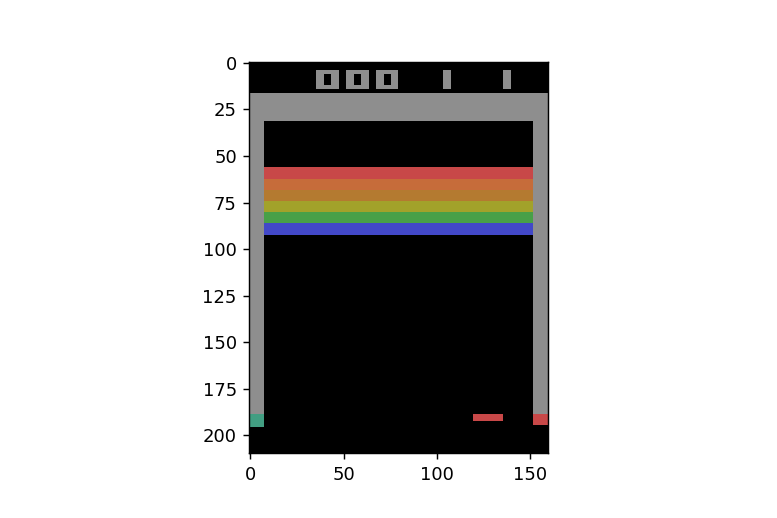

In [22]:
%matplotlib nbagg

fig = plt.figure()

pobs = env.reset()
im = plt.imshow(pobs, animated=True)

def render(*args):
    pobs, _, _, _ = env.step(env.action_space.sample())
    im.set_array(pobs)
    return im

ani = animation.FuncAnimation(fig, render, interval=10)
plt.show()

<IPython.core.display.Javascript object>


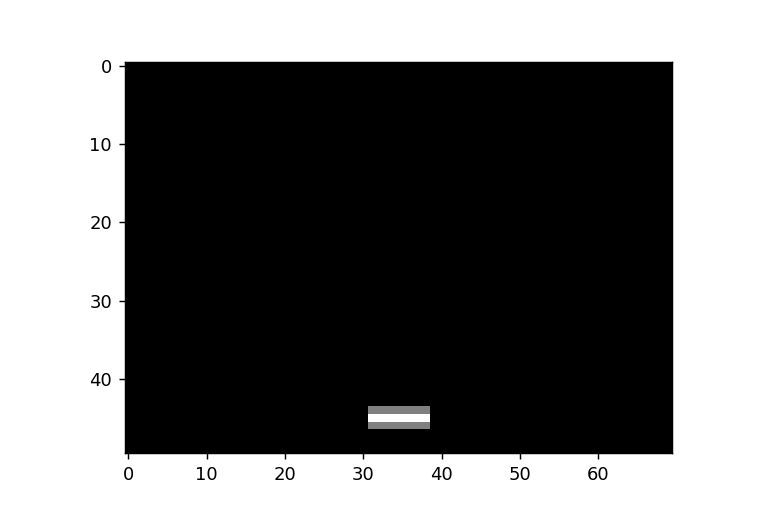

In [24]:
%matplotlib nbagg

fig = plt.figure()

def convert(obs):
    # グレースケール
    obs = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)
    # リサイズ
    height, width = obs.shape
    size = (int(width*0.5), int(height*0.5))
    obs = cv2.resize(obs, size)
    # カット
    obs = obs[50:100, 5:75]
    return obs

pobs = env.reset()
pobs = convert(pobs)
im = plt.imshow(pobs, cmap="gray", animated=True)

def render(*args):
    pobs, _, _, _ = env.step(env.action_space.sample())
    pobs = convert(pobs)
    im.set_array(pobs)
    return im

ani = animation.FuncAnimation(fig, render, interval=10)
plt.show()

* For example CNN, 

```python
class CNN(chainer.Chain):

    def __init__(self):
    
        super(CNN, self).__init__(
            conv1 = L.Convolution2D(1, 32, (5, 70)),
            fc2 = L.Linear(None, 100),
            fc3 = L.Linear(100, env.action_space.n)
        )
        
    def __call__(self, x):
    
        h = F.max_pooling_2d(self.conv1(x), 2)
        h = F.relu(self.fc2(h))
        y = self.fc3(h)
        return y
```